# Quantum Teleportation

#### Alice wants to send quantum information to Bob. Specifically, suppose she wants to send the qubit state $|\psi\rangle=\alpha|0\rangle+\beta|1\rangle$ . This entails passing on information about $\alpha$ and $\beta$ to Bob.

#### No-cloning theorem states that you cannot simply make an exact copy of an unknown quantum state. As a result of this we can see that Alice can't simply generate a copy of $|\psi\rangle$ and give the copy to Bob.

#### By taking advantage of two classical bits and an entangled qubit pair, Alice can transfer her state $|\psi\rangle$ to Bob. We call this teleportation because, at the end, Bob will have $|\psi\rangle$ and Alice won't anymore.

## The Quantum Teleportation Protocol

#### To transfer a quantum bit, Alice and Bob must use a third party (Telamon) to send them an entangled qubit pair. Alice then performs some operations on her qubit, sends the results to Bob over a classical communication channel, and Bob then performs some operations on his end to receive Alice’s qubit.

![Quantum-Teleportation](./teleportation.png)

In [1]:
import numpy as np
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import IBMQ, Aer, transpile
from qiskit.visualization import plot_histogram, plot_bloch_multivector, array_to_latex
from qiskit.extensions import Initialize
from qiskit.result import marginal_counts
from qiskit.quantum_info import random_statevector

In [2]:
qr=QuantumRegister(3,'q')
crz=ClassicalRegister(1,'crz')
crx=ClassicalRegister(1,'crx')

teleportation=QuantumCircuit(qr,crz,crx)

### Step 1
#### Creates an entangled pair of qubits and gives one to Bob and one to Alice. We will create a **Bell State** by applying a **Hadamard Gate** and **CNot-gate**

In [3]:
def create_bell_state (teleportation,qr,cr):
    teleportation.h(qr)
    teleportation.cx(qr,cr)
    # teleportation.draw()
    return teleportation

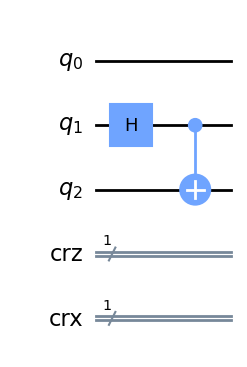

In [4]:

teleportation=create_bell_state(teleportation,qr[1],qr[2])
teleportation.draw('mpl')

## Step 2

#### Alice applies a CNOT gate to $q_1$, controlled by $|\psi\rangle$ (the qubit she is trying to send Bob). Then Alice applies a Hadamard gate to $q_0$ . In our quantum circuit, the qubit ($|\psi\rangle$) Alice is trying to send is $q_0$


In [5]:
def controlled_psi(teleportation,psi,a):
    teleportation.cx(psi,a)
    teleportation.h(psi)
    return teleportation

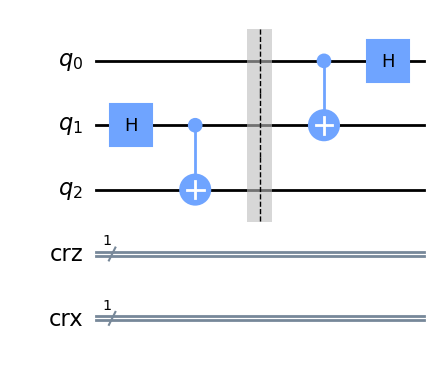

In [6]:
teleportation.barrier()
teleportation=controlled_psi(teleportation,qr[0],qr[1])
teleportation.draw('mpl')

## Step 3

#### Next, Alice applies a measurement to both qubits that she owns, $q_1$and $|\psi\rangle$, and stores this result in two classical bits. She then sends these two bits to Bob

In [7]:
teleportation.barrier()
teleportation.measure(qr[0],crz)
teleportation.measure(qr[1],crx)

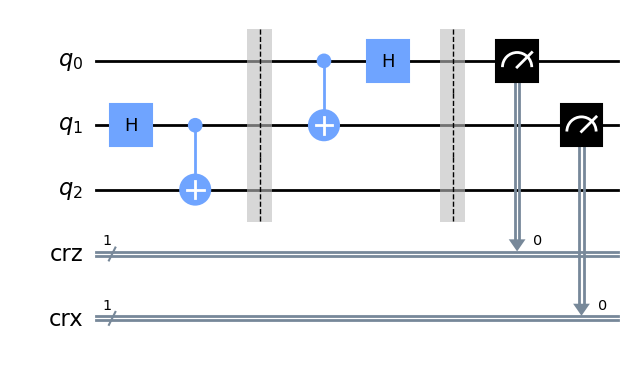

In [8]:
teleportation.draw('mpl')

## Step 4
#### Bob, who already has the qubit $q_2$ , then applies the following gates depending on the state of the classical bits:

### 00 $\rightarrow$ Do nothing

### 01 $\rightarrow$ Apply $X$ gate

### 10 $\rightarrow$ Apply $Z$ gate

### 11 $\rightarrow$ Apply $ZX$ gate

In [9]:
def bob_gate(teleportation,crx,crz):
    
    with teleportation.if_test((crx,1)):
        teleportation.x(2)
    with teleportation.if_test((crz,1)):
        teleportation.z(2)

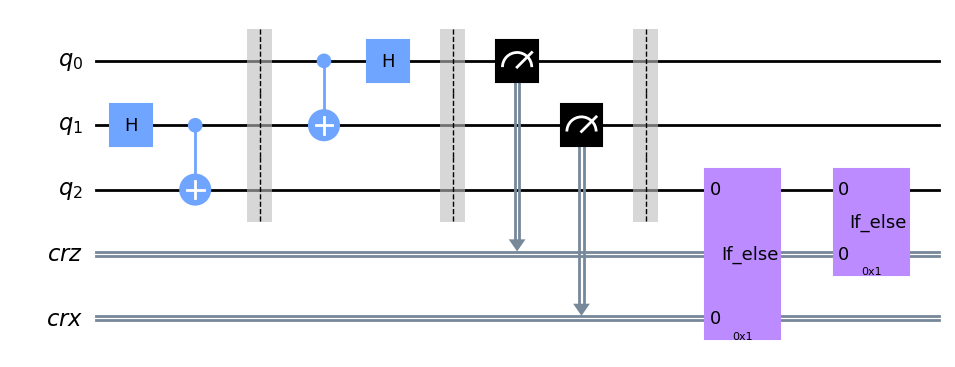

In [10]:
teleportation.barrier()
bob_gate(teleportation,crx,crz)
teleportation.draw('mpl')

##  Simulating the Teleportation Protocol

<IPython.core.display.Latex object>

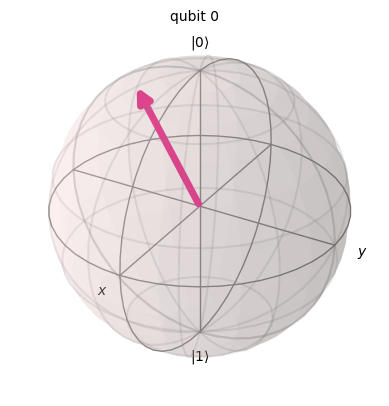

In [11]:
psi=random_statevector(2)
display(array_to_latex(psi, prefix="|\\psi\\rangle ="))
plot_bloch_multivector(psi)

In [12]:
init_gate=Initialize(psi)
init_gate.label='init'

In [13]:
qr=QuantumRegister(3,'q')
crx=ClassicalRegister(1,'crx')
crz=ClassicalRegister(1,'crz')
qc=QuantumCircuit(qr,crx,crz)



In [14]:
qc.append(init_gate,[qr[0]])
# qc.draw('mpl')
qc.h(qr[1])
qc.cx(qr[1],qr[2])
qc.barrier()
qc.cx(qr[0],qr[1])
qc.h(qr[0])

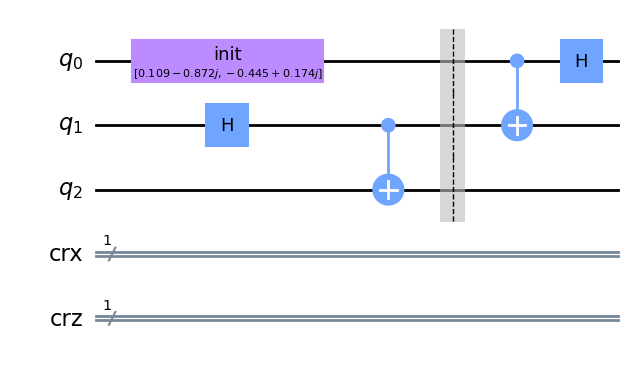

In [15]:
qc.draw('mpl')

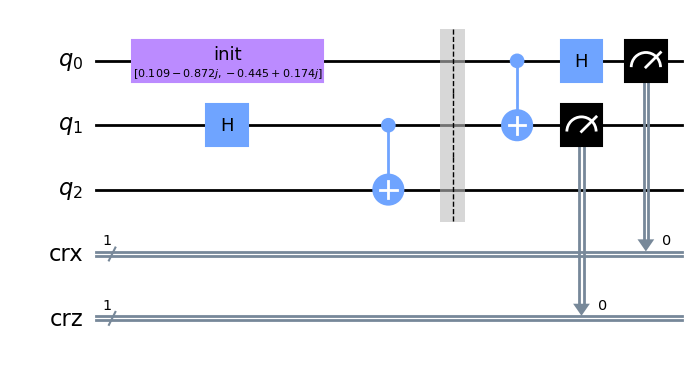

In [16]:
qc.measure(qr[0],crx)
qc.measure(qr[1],crz)
qc.draw('mpl')

In [17]:
with qc.if_test((crx,1)):
    qc.x(qr[2])
with qc.if_test((crz,1)):
    qc.z(qr[2])

In [18]:
sim=Aer.get_backend('aer_simulator')
qc.save_statevector()

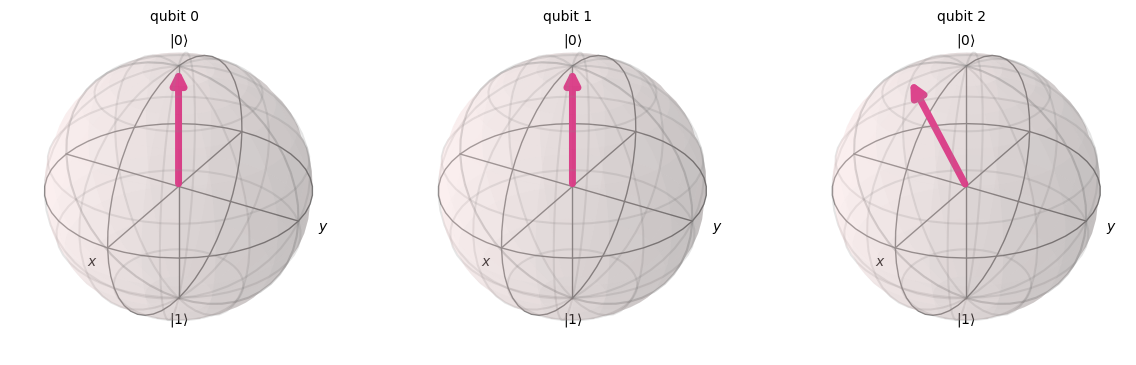

In [19]:
result=sim.run(qc).result()

statevector=result.get_statevector()
plot_bloch_multivector(statevector)

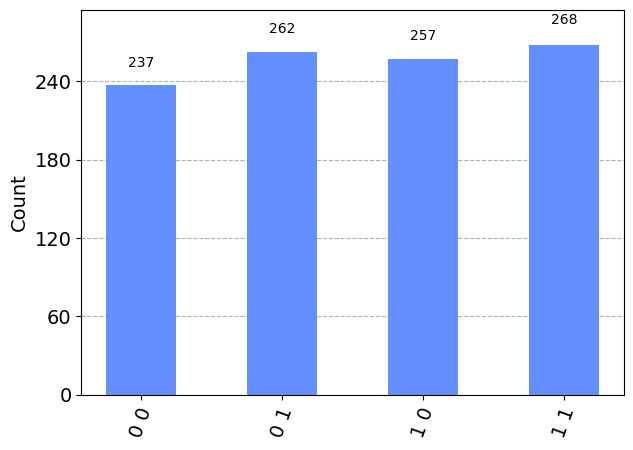

In [20]:


count=result.get_counts()
plot_histogram(count)

## Understanding Quantum Teleportation

#### Alice needs to transmit $|\psi\rangle=\alpha|0\rangle+\beta|1\rangle$ (a random qubit) to Bob. She doesn't know the state of the qubit.
## Step 1
#### For this we prepare a pair of **Entangled** Qubit or **Bell State** 

### $|e\rangle=\frac{1}{\sqrt{2}}(|00\rangle+|11\rangle)$

#### Alice and Bob each possess one qubit of the entangled pair 

### $|e\rangle=\frac{1}{\sqrt{2}}(|0\rangle_A\langle0|_B+|1\rangle_A\langle1|_B)$


#### So Alice what to send $|\psi\rangle$ and they poseese $|e\rangle$ so this create a **Three Qubit** system. We combine them using **Tensor Product**

### $|\psi\rangle \otimes |e\rangle=(\alpha|0\rangle+\beta|1\rangle) (\frac{1}{\sqrt{2}}(|00\rangle+|11\rangle))$
### $=\frac{1}{\sqrt{2}}(\alpha|000\rangle+\alpha|011\rangle+\beta|100\rangle+\beta|111\rangle)$

## Step 2

### $(A\otimes B)(C\otimes D)=(AC)\otimes(BD)$

### $(A + B) \otimes (C + D) = A(C + D) + B(C + D)$




In [21]:
import numpy as np

A = np.array([[1, 2], [3, 4]])
B = np.array([[5, 6], [7, 8]])
C = np.array([[9, 10], [11, 12]])
D = np.array([[13, 14], [15, 16]])

tensor_AB = np.kron(A, B)

tensor_CD = np.kron(C, D)

result1 = np.matmul(tensor_AB, tensor_CD)


print(result1)

matmul_AC = np.matmul(A, C)

matmul_BD = np.matmul(B, D)

result2 = np.kron(matmul_AC, matmul_BD)

print(result2)


[[ 4805  5146  5270  5644]
 [ 6541  7006  7174  7684]
 [11005 11786 12090 12948]
 [14981 16046 16458 17628]]
[[ 4805  5146  5270  5644]
 [ 6541  7006  7174  7684]
 [11005 11786 12090 12948]
 [14981 16046 16458 17628]]


#### Now Alice have to use a Controlled Not gate or **CNOT-gate** to the $|\psi\rangle$ and the qubit he posses

### $(CNOT\otimes I)(|\psi\rangle\otimes|e\rangle)$

### $=(CNOT\otimes I)\frac{1}{\sqrt{2}}(\alpha|000\rangle+\alpha|011\rangle+\beta|100\rangle+\beta|111\rangle)$

#### As **CNOT-gate** apply on two qubit so **CNOT-gate** will aply on first 2 qubit and $I$ will act on 3rd qubit as it's an Identity operation 3rd qubit will remain unchanged

### $(CNOT \otimes I) |000\rangle=(CNOT \otimes I)(|00\rangle \otimes |0\rangle)=(CNOT |00\rangle)\otimes (I|0\rangle)$

### Now applying 

### $(CNOT\otimes I)(|\psi\rangle\otimes|e\rangle)=(CNOT\otimes I)\frac{1}{\sqrt{2}}(\alpha|000\rangle+\alpha|011\rangle+\beta|100\rangle+\beta|111\rangle)$
### $=\frac{1}{\sqrt{2}}(\alpha|000\rangle+\alpha|011\rangle+\beta|110\rangle+\beta|101\rangle)$

### Now we have to apply **Hadamard-gate** on $|\psi\rangle$



### $(H\otimes I\otimes I)(CNOT\otimes I)(|\psi\rangle\otimes|e\rangle)$

### $(H\otimes I\otimes I) \frac{1}{\sqrt{2}}(\alpha|000\rangle+\alpha|011\rangle+\beta|110\rangle+\beta|101\rangle)$

### $(H\otimes I\otimes I)(\alpha|000\rangle)=(H\otimes I\otimes I) \alpha(|0\rangle\otimes|0\rangle\otimes|0\rangle)=(H|0\rangle)\otimes (I|0\rangle)\otimes(I|0\rangle)$
---

### $H|0\rangle=\frac{1}{\sqrt{2}}(|0\rangle+|1\rangle)$
### $H|1\rangle=\frac{1}{\sqrt{2}}(|0\rangle-|1\rangle)$

### $(H\otimes I\otimes I) \frac{1}{\sqrt{2}}(\alpha|000\rangle+\alpha|011\rangle+\beta|110\rangle+\beta|101\rangle)$
### $=\frac{1}{\sqrt{2}}[\frac{1}{\sqrt{2}}(|0\rangle+|1\rangle)\alpha|00\rangle+\frac{1}{\sqrt{2}}(|0\rangle+|1\rangle)\alpha|11\rangle+\frac{1}{\sqrt{2}}(|0\rangle-|1\rangle)\beta|10\rangle+\frac{1}{\sqrt{2}}(|0\rangle-|1\rangle)\beta|01\rangle]$

### $=\frac{1}{2}[(|0\rangle+|1\rangle)\alpha|00\rangle+(|0\rangle+|1\rangle)\alpha|11\rangle+(|0\rangle-|1\rangle)\beta|10\rangle+(|0\rangle-|1\rangle)\alpha|01\rangle]$



### $=\frac{1}{2}[\alpha|000\rangle+\alpha|100\rangle+\alpha|011\rangle+\alpha|111\rangle+\beta|010\rangle-\beta|110\rangle+\beta|001\rangle-\beta|101\rangle]$

### $\frac{1}{2}=(|00\rangle(\alpha|0\rangle+\beta|1\rangle)\\ \qquad +|01\rangle(\alpha|1\rangle+\beta|0\rangle)\\ \qquad+|10\rangle(\alpha|0\rangle-\beta|1\rangle)\\\qquad+|11\rangle(\alpha|1\rangle-\beta|0\rangle))$

## Step 3

#### Alice measures the first two qubit (which she owns) and sends them as two classical bits to Bob. The result she obtains is always one of the four standard basis states $|00\rangle,|01\rangle,|10\rangle$  and $|11\rangle$  with equal probability.

### $|00\rangle \rightarrow (\alpha|0\rangle+\beta|1\rangle)\\  |01\rangle\rightarrow(\alpha|1\rangle+\beta|0\rangle)\\ |10\rangle\rightarrow(\alpha|0\rangle-\beta|1\rangle)\\|11\rangle\rightarrow(\alpha|1\rangle-\beta|0\rangle)$


## Step 4

| Bob's State | Bits Received | Gate Applied |
|----------|----------|----------|
|   $\alpha\|0\rangle+\beta\|1\rangle$ |   00  |   $I$   |
|   $\alpha\|1\rangle+\beta\|0\rangle$ |   01   |   $X$   |
| $\alpha\|0\rangle-\beta\|1\rangle$| 10| $Z$
|    $\alpha\|1\rangle-\beta\|0\rangle$|11|$ZX$